0.25
0.5
0.75
[[ 2.109375 -1.        0.      ]
 [-1.        2.09375  -1.      ]
 [ 0.       -1.        2.078125]]
[0.015625, 0.03125, 0.046875]
U= [0.03289758 0.05376834 0.04842988]
U ( 0.25 ) = 0.03289758316886325
U ( 0.5 ) = 0.053768339496820916
U ( 0.75 ) = 0.048429877652605556


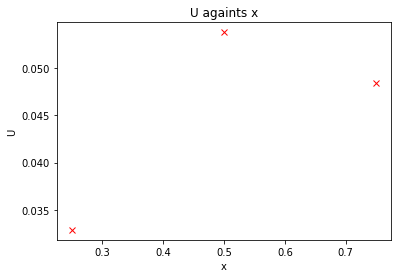

In [60]:
#BVP linear: Finite difference methode
#based on CA1 Question 5

import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve 
from scipy.sparse import diags

n=4
h=1/n
xo=0
xi=0+h
xj=xo+h*n
x0=0
xx=x0+h
g0=0
g1=0

def p(x):
    return 0
def q(x):
    return 2-x
def f(x):
    return x
def AD(x):
    return 2+q(x)*h**2
def ATD(x):
    return -(1-(1/2)*p(x)*h)
def ABD(x):
    return -(1+(1/2)*p(x)*h)
def BT(x):
    return (1+(1/2)*p(x)*h)*g0+(h**2)*f(x)
def BM(x):
    return (h**2)*f(x)
def BB(x):
    return (1-(1/2)*p(x)*h)*g1+(h**2)*f(x)

dataAD  = []
dataATD = []
dataABD = []

MatB= []

for i in range(1,n):
    x=x0+h
    dataAD.append(AD(x))
    dataABD.append(ABD(x))
    dataATD.append(ATD(x))
    x0=x
    
for i in range(1,n):
    xy=xx+h
    
    if i == 1:
        MatB.append(BT(xx))
    elif i > 1 & i < n-2:
        MatB.append(BM(xx))
    else:
        MatB.append(BB(xx))
    print(xx)
    xx=xy


dataA=np.array([dataAD,dataABD,dataATD])
MatA=diags(dataA, [0, -1, 1]).toarray()

print(MatA)
print(MatB)
U = solve(MatA,MatB)
X=np.arange(xi,xj,h)
print("U=",U)

for i in range(n-1):
    print("U (",X[i],") =",U[i])

plt.plot(X,U, "rx")
plt.xlabel('x') 
plt.ylabel('U') 
plt.title("U againts x")
plt.show() 


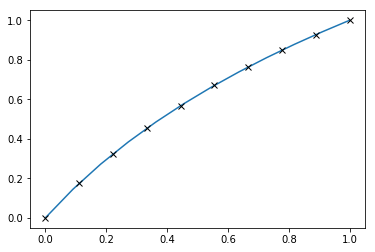

In [45]:
#BVP non linear: Finite different methode
#Based on example 1.2

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

a=0
b=1
n=10
ua=0
ub=1

h=(b-a)/(n+1)

X = np.linspace(a, b, n)

def Upp(x,u,up):
    return -up**2

def FDM(u):
    
    Sol = np.zeros(u.shape)
    
    Sol[0] = u[0]-ua
    for i in range(1,n-1):
        x = X[i]
        Sol[i] = (1/(h**2))*(u[i+1]-2*u[i]+u[i-1])-Upp(x,u[i],(1/(2*h))*(u[i+1]-u[i-1]))
        
    Sol[-1] = u[-1]-ub
    return Sol

u0 = ua + X*((ub-ua)/(b-a))
U = fsolve(FDM,u0)

xtrue = np.arange(a,b+h,h)
ytrue = np.log((np.exp(1)-1)*xtrue+1)
    
plt.plot(xtrue,ytrue)
plt.plot(X, U, 'xk')
plt.show()


[0.0, 0.04, 0.08, 0.12, 0.16, 0.2, 0.24000000000000002, 0.28, 0.32, 0.36, 0.39999999999999997, 0.43999999999999995, 0.4799999999999999, 0.5199999999999999, 0.5599999999999999, 0.6, 0.64, 0.68, 0.7200000000000001, 0.7600000000000001, 0.8000000000000002, 0.8400000000000002, 0.8800000000000002, 0.9200000000000003, 0.9600000000000003, 1.0000000000000002]


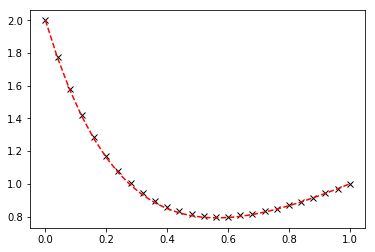

Absolute error for each point = [-1.         -0.76932168 -0.57446762 -0.41067846 -0.27382671 -0.16033287
 -0.06709266  0.00858609  0.06903812  0.11628826  0.15209254  0.1779739
  0.19525314  0.20507574  0.20843519  0.2061931   0.1990968   0.18779444
  0.17284819  0.15474568  0.13390986  0.11070762  0.08545721  0.05843474
  0.02987973  0.        ]


In [61]:
#BVP linear: Shooting methode
#Based on example 1.4

import numpy as np
import matplotlib.pyplot as plt

n=25
h=1/n
x=0.0
y1=2.0
y2=0.0
y3=0.0
y4=1.0
a=0.0
b=1.0

y1i=[y1]
y3i=[y3]
xi=[x]

def p(x):
    return -3
def q(x):
    return 2
def f(x):
    return -2*x+3

def f1(x,y1,y2):
    return y2

def f2(x,y1,y2):
    return p(x)*y2+q(x)*y1+f(x)

def f3(x,y3,y4):
    return y4

def f4(x,y3,y4):
    return p(x)*y4+q(x)*y3

xn=np.arange(a,b+h,h)

def ytrue(xn):
    return (np.exp(np.sqrt(17))*xn - xn - 2*np.exp(0.5*xn*(np.sqrt(17)-3)) + 2*np.exp(np.sqrt(17) - 0.5*xn*(3+np.sqrt(17))))/(np.exp(np.sqrt(17))-1)

beta=ytrue(b)

for i in range(n):
    K11= f1(x,y1,y2)
    K12= f2(x,y1,y2)
    
    K21= f1(x+h/2,y1+h+K11/2,y2+h*K12/2)
    K22= f2(x+h/2,y1+h*K11/2,y2+h*K12/2)
    
    K31= f1(x+h/2,y1+h*K21/2,y2+h*K22/2)
    K32= f2(x+h/2,y1+h*K21/2,y2+h*K22/2)
    
    K41= f1(x+h,y1+h*K31,y2+h*K32)
    K42= f2(x+h,y1+h*K31,y2+h*K32)
    
    y11=y1+h*(K11+2*K21+2*K31+K41)/6
    
    y1=y11
    
    y22=y2+h*(K12+2*K22+2*K32+K42)/6
    y2=y22
    
    K13= f3(x,y3,y4)
    K14= f4(x,y3,y4)
    
    K23= f3(x+h/2,y3+h*K13/2,y4+h*K14)
    K24= f4(x+h/2,y3+h*K13/2,y4+h*K14)
    
    K33= f3(x+h/2,y3+h*K23/2,y4+h*K24/2)
    K34= f4(x+h/2,y3+h*K23/2,y4+h*K24/2)
    
    K43= f3(x+h,y3+h*K33,y4+h*K34)
    K44= f4(x+h,y3+h*K33,y4+h*K34)
    
    y33=y3+h*(K13+2*K23+2*K33+K43)/6
    y3=y33
    
    y44=y4+h*(K14+2*K24+2*K34+K44)/6
    y4=y44
    
    y1i.append(y1)
    y3i.append(y3)

    x=x+h
    xi.append(x)

U=[]

for i in range(n+1):
    yx=y1i[i]+(beta-y1i[-1])*(y3i[i])/(y3i[-1])
    U.append(yx)
    
plt.plot(xi,U,'xk')
plt.plot(xn,ytrue(xn),'--r')
plt.show()

Error = yx - ytrue(xn)
print("Absolute error for each point =",Error)
      
#z=0
#print("Error for point", z+1 ,"=", Error[z])


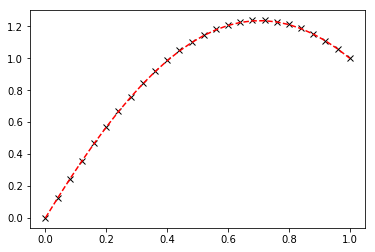

Absolute error for each point = [1.         0.87639223 0.75721883 0.64295012 0.53403706 0.43090949
 0.33397441 0.24361436 0.16018597 0.08401848 0.0154125  0.04536122
 0.09806284 0.14248436 0.17845048 0.20581924 0.22448265 0.23436703
 0.2354334  0.22767752 0.21113003 0.18585621 0.15195582 0.10956264
 0.05884398 0.        ]


In [20]:
#BVP nonlinear: Shooting methode
#Based on example 1.5

import numpy as np
import matplotlib.pyplot as plt

n=25

x=0
x0=0.0
x1=1.0
u0=0.0
u1=1.0

h=(x1-x0)/n



s0 = (u1-u0)/(x1-x0)
ds = 0.01
s1 = s0+ds
tol = 1.0e-5


#concept same as linear
def p(x):
    return 0
def q(x):
    return -((np.pi)**2)/4
def f(x):
    return -((np.pi)**2)/4

def f1(x,y1,y2):
    return y2

def f2(x,y1,y2):
    return p(x)*y2+q(x)*y1+f(x)

def f3(x,y3,y4):
    return y4

def f4(x,y3,y4):
    return p(x)*y4+q(x)*y3

xn=np.arange(x0,x1+h,h)

def ytrue(xn):
    return (np.cos(np.pi*xn/2.0))+2.0*(np.sin(np.pi*xn/2.0))-1.0

beta=ytrue(x1)

for i in range(n):

    y1=0.0
    y2=s0
    y3=0.0
    y4=s1
    y1i=[y1]
    y3i=[y3]


    
    for i in range(n):
        K11= f1(x,y1,y2)
        K12= f2(x,y1,y2)
    
        K21= f1(x+h/2,y1+h+K11/2,y2+h*K12/2)
        K22= f2(x+h/2,y1+h*K11/2,y2+h*K12/2)
    
        K31= f1(x+h/2,y1+h*K21/2,y2+h*K22/2)
        K32= f2(x+h/2,y1+h*K21/2,y2+h*K22/2)
    
        K41= f1(x+h,y1+h*K31,y2+h*K32)
        K42= f2(x+h,y1+h*K31,y2+h*K32)
    
        y11=y1+h*(K11+2*K21+2*K31+K41)/6
    
        y1=y11
    
        y22=y2+h*(K12+2*K22+2*K32+K42)/6
        y2=y22
    
        K13= f3(x,y3,y4)
        K14= f4(x,y3,y4)
    
        K23= f3(x+h/2,y3+h*K13/2,y4+h*K14)
        K24= f4(x+h/2,y3+h*K13/2,y4+h*K14)
    
        K33= f3(x+h/2,y3+h*K23/2,y4+h*K24/2)
        K34= f4(x+h/2,y3+h*K23/2,y4+h*K24/2)
    
        K43= f3(x+h,y3+h*K33,y4+h*K34)
        K44= f4(x+h,y3+h*K33,y4+h*K34)
    
        y33=y3+h*(K13+2*K23+2*K33+K43)/6
        y3=y33
    
        y44=y4+h*(K14+2*K24+2*K34+K44)/6
        y4=y44
    
        y1i.append(y1)
        y3i.append(y3)

        x0=x0+h
    
        
    del1 = y11 - 1
    del3 = y33 - 1
        
    d = abs(del1-del3)
        
    if d > tol:
        s2 = s1 - del3*(s1-s0)/d
        s0=s1
        s1=s2 
U=[]

for i in range(n+1):
    yx=y1i[i]+(beta-y1i[-1])*(y3i[i])/(y3i[-1])
    U.append(yx)
    
xi=np.arange(x,x1+h,h)
plt.plot(xi,U,'xk')
plt.plot(xn,ytrue(xn),'--r')
plt.show()

Error = abs(yx - ytrue(xn))
print("Absolute error for each point =",Error)
